### Data generation process

In [39]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def simulate_private_equity_cashflows(
    n_funds=2400,
    quarters_per_fund=60,
    random_seed=18
):
    np.random.seed(random_seed)
    
    # 1. Create fund universe
    funds = []
    for i in range(n_funds):
        vintage = 1990 + random.randint(0, 19)  # 20 vintages
        strategy = 'Buyout' if (random.randint(0, 1) % 2) == 0 else 'Venture'
        geography = 'North America' if (random.randint(0, 1) % 2) == 0 else 'Rest of World'
        quality = 'Good' if (random.randint(0, 1) % 2) == 0 else 'Bad'
        funds.append({
            'FundID': i,
            'VintageYear': vintage,
            'Strategy': strategy,
            'Geography': geography,
            'FundQuality': quality
        })
    funds_df = pd.DataFrame(funds)
    
    # 2. Generate cash flows for each fund
    cashflow_dfs = []
    
    for idx, fund in funds_df.iterrows():
        quarters = np.arange(0, quarters_per_fund)

        # Contributions (capital calls)
        size_c = random.randint(6, 12)
        contrib_periods = np.random.choice(quarters[:12], size=size_c, replace=False)
        contrib_cashflows = np.random.uniform(-1, -0.5, size=size_c)

        # Distributions (returns)
        dist_start = np.random.randint(13, 16)
        dist_end = np.random.randint(40, 60)
        size_d = random.randint(12, 24)
        dist_quarters = np.random.choice(quarters[dist_start:dist_end], size=size_d, replace=False)
        dist_cashflows = np.random.uniform(0.2, 0.8, size=size_d)

        # Initialize cashflows
        cashflow_series = np.zeros(quarters_per_fund)
        cashflow_series[contrib_periods] = contrib_cashflows
        cashflow_series[dist_quarters] = dist_cashflows

        # Apply adjustments based on fund characteristics
        if fund['Strategy'] == 'Venture':
            cashflow_series *= 1.3
        if fund['Geography'] == 'North America':
            cashflow_series *= 1.15
        else:
            cashflow_series *= 0.8
        if fund['VintageYear'] % 2 == 1:
            cashflow_series *= 1.2
        else:
            cashflow_series *= 0.9
        if fund['FundQuality'] == 'Good':
            cashflow_series *= 1.4
        else:
            cashflow_series *= 0.75

        cf_df = pd.DataFrame({
            'FundID': fund['FundID'],
            'VintageYear': fund['VintageYear'],
            'Strategy': fund['Strategy'],
            'Geography': fund['Geography'],
            'FundQuality': fund['FundQuality'],
            'Quarter': quarters,
            'Cashflow': cashflow_series
        })
        cf_df['date'] = pd.date_range(start=str(fund['VintageYear'])+'-01-01', end=str(fund['VintageYear']+14)+'-12-31', freq='QE')
        cashflow_dfs.append(cf_df)

    # 3. Merge everything into one big tidy DataFrame
    all_cashflows_df = pd.concat(cashflow_dfs, ignore_index=True)
    
    return all_cashflows_df


In [ ]:
cashflows = simulate_private_equity_cashflows()

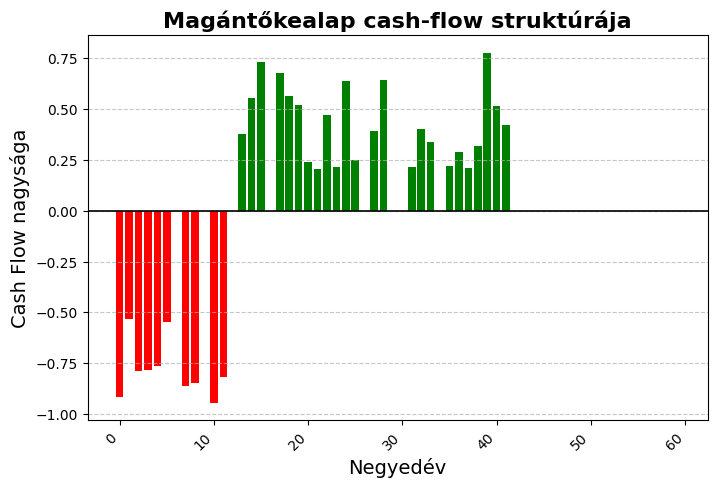

In [61]:
df = cashflows[cashflows['FundID'] == 3]
plt.figure(figsize=(8, 5))
bars = plt.bar(df['Quarter'], df['Cashflow'], color=['green' if x > 0 else 'red' for x in df['Cashflow']])

# Add title and labels
plt.title('Magántőkealap cash-flow struktúrája', fontsize=16, fontweight='bold')
plt.xlabel('Negyedév', fontsize=14)
plt.ylabel('Cash Flow nagysága', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding horizontal line at y=0 for visual separation
plt.axhline(0, color='black', linewidth=1.2)

# Add gridlines on y-axis for better readability of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [62]:
cashflows

,FundID,VintageYear,Strategy,Geography,FundQuality,Quarter,Cashflow,date
0,0,1996,Venture,North America,Bad,0,-0.994843,1996-03-31
1,0,1996,Venture,North America,Bad,1,0.000000,1996-06-30
2,0,1996,Venture,North America,Bad,2,-0.581603,1996-09-30
3,0,1996,Venture,North America,Bad,3,0.000000,1996-12-31
4,0,1996,Venture,North America,Bad,4,-0.510670,1997-03-31
...,...,...,...,...,...,...,...,...
143995,2399,2009,Venture,Rest of World,Good,55,0.000000,2022-12-31
143996,2399,2009,Venture,Rest of World,Good,56,0.000000,2023-03-31
143997,2399,2009,Venture,Rest of World,Good,57,0.000000,2023-06-30
143998,2399,2009,Venture,Rest of World,Good,58,0.000000,2023-09-30
